# Import Dependencies

In [1]:
# System
import os

# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# Get Data

In [2]:
file_path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/cutfree-simulations/runtime_data_v1.csv"
df = pd.read_csv(file_path)
df.iloc[0]

Oligo                        NNNNNN
OligoLength                       6
Sites                   Any["YATR"]
TotalSites                        1
SiteLength                        4
CutFree_Randomer             NBNVVN
CutFree_Degeneracy          7.45472
CutFree_Time               0.006211
CutFreeRL_Randomer           NNVVVN
CutFreeRL_Degeneracy        7.45472
CutFreeRL_Time             0.228063
Name: 0, dtype: object

In [3]:
df.loc[(df["OligoLength"] == 6) & (df["TotalSites"] == 1) & (df["SiteLength"] == 4)]

,Oligo,OligoLength,Sites,TotalSites,SiteLength,CutFree_Randomer,CutFree_Degeneracy,CutFree_Time,CutFreeRL_Randomer,CutFreeRL_Degeneracy,CutFreeRL_Time
0,NNNNNN,6,"Any[""YATR""]",1,4,NBNVVN,7.45472,0.006211,NNVVVN,7.45472,0.228063


In [4]:
conditions = [
    (df["CutFree_Time"] <= df["CutFreeRL_Time"]),
    (df["CutFree_Time"] > df["CutFreeRL_Time"])
]

values = [0, 1] # 0 = CutFree, 1 = CutFreeRL

In [5]:
df["Algorithm"] = np.select(conditions, values)
df = df[["Oligo", "Sites", "Algorithm"]]
df.Oligo = df.Oligo.astype("category")
df.Sites = df.Sites.astype("category")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Oligo      1750 non-null   category
 1   Sites      1750 non-null   category
 2   Algorithm  1750 non-null   int32   
dtypes: category(2), int32(1)
memory usage: 91.0 KB


,Oligo,Sites,Algorithm
0,NNNNNN,"Any[""YATR""]",0
1,NNNNNN,"Any[""TTAA"", ""RGCY""]",0
2,NNNNNN,"Any[""CGCG"", ""CCTC"", ""CTAG""]",0
3,NNNNNN,"Any[""CNNR"", ""GATC"", ""AATT"", ""TCGA""]",0
4,NNNNNN,"Any[""AATT"", ""CATG"", ""ASST"", ""CNNR"", ""YATR""]",0
...,...,...,...
1745,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CRCCGGYG"", ""GTTTAAAC"", ""CCTGCAGG"", ""GCGGC...",1
1746,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CCTCGAGG"", ""TTAATTAA"", ""GCGATCGC"", ""CGTCG...",1
1747,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""GCGATCGC"", ""CGCGCGCG"", ""GCCCGGGC"", ""CCTGC...",1
1748,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CGCCGGCG"", ""RTGCGCAY"", ""GCCCGGGC"", ""GTTTA...",1


# Get Train/Test Split

In [6]:
x = df.drop(["Algorithm"], axis=1)
y = df["Algorithm"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
x_train.head()

,Oligo,Sites
642,NNNNNNNNNNNNNNNNNN,"Any[""VCTCGAGB"", ""TTAATTAA"", ""CRCCGGYG""]"
1141,NNNNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CRCCGGYG"", ""CCTCGAGG""]"
1027,NNNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""CAGCTG"", ""ACTAGT"", ""GAGGAG"", ""TCGCGA"", ""C..."
977,NNNNNNNNNNNNNNNNNNNNNNNNN,"Any[""GTCGAC"", ""GTGCAC"", ""ACCGGT"", ""GCCGAG"", ""C..."
570,NNNNNNNNNNNNNNNNN,"Any[""GATATC""]"


In [8]:
y_train.head()

642     0
1141    0
1027    1
977     0
570     0
Name: Algorithm, dtype: int32

# One-Hot Encoder

In [9]:
x_train_one_hot = pd.get_dummies(x_train, columns = ["Oligo", "Sites"])
x_test_one_hot = pd.get_dummies(x_test, columns = ["Oligo", "Sites"])

# Accuracy Function

In [10]:
def get_accuracy(pred, true):
    test_accuracy = accuracy_score(pred, true)*100
    print("Accuracy: {:.2f}%".format(test_accuracy))
    return test_accuracy

# MLP Classifier NN

In [11]:
class_NN = MLPClassifier(max_iter=500, random_state=1)
class_NN.fit(x_train_one_hot, y_train)

MLPClassifier(max_iter=500, random_state=1)

In [12]:
y_pred = class_NN.predict(x_test_one_hot)
get_accuracy(y_pred, y_test)

Accuracy: 75.71%


75.71428571428571

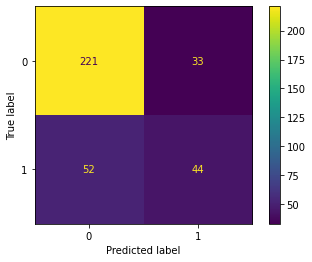

In [13]:
plot_confusion_matrix(class_NN, x_test_one_hot, y_test)  
plt.show()

In [14]:
print(classification_report(y_pred, y_test, target_names=["CutFree", "CutFreeRL"]))

              precision    recall  f1-score   support

     CutFree       0.87      0.81      0.84       273
   CutFreeRL       0.46      0.57      0.51        77

    accuracy                           0.76       350
   macro avg       0.66      0.69      0.67       350
weighted avg       0.78      0.76      0.77       350

